In [1]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 325.1 kB/s eta 0:06:25
   ---------------------------------------- 0.1/124.9 MB 469.7 kB/s eta 0:04:26
   ---------------------------------------- 0.2/124.9 MB 919.0 kB/s eta 0:02:16
   ---------------------------------------- 0.3/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.6/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 1.0/124.9 MB 3.0 MB/s eta 0:00:42
   ---------------------------------------- 1.3/124.9 MB 3.6 MB/s eta 0:00:35
   ---------------------------------------- 1.5/124.9 MB 3.6 MB/s eta 0:00:35
    --------------------------------------- 1.9/124.9 MB 4.1 MB/s eta 0:00:30
    --------------------------------------- 2.3/124.9 MB 4.5 MB/s eta 0:00:28
    --------------------------------------- 2.7/124.9 MB 5.1 MB/s eta 0:


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# EDA & data preprocessing

In [1]:
#1.	Load the Titanic dataset using Python's pandas library.
import pandas as pd 
data=pd.read_csv(r"C:\Users\Microsoft\Downloads\Titanic_train.csv")
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.shape,data.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [4]:
#2 missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Remove rows with NaN values
data = data.dropna()

# Write the cleaned DataFrame back to a new CSV file
data.to_csv('cleaned_file.csv', index=False)
data

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
6        0     17463  51.8625          E46        S  
10       1   PP 9549  16.7000           G6        S  
11       0    113783  26.5500         C103        S  
..     ...       ...      ...          ...      ...  
871      1     11751  52.5542          D35        S  
872      0       695   5.0000  B51 B53 B55        S  
879      1     11767  83.1583          C50        C  
887      0    112053  30.0000          B42        S  
889      0    111369  30.0000         C148        C  

[183 rows x 12 columns]

In [6]:
data[data.duplicated()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [7]:
data.drop_duplicates()

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
6        0     17463  51.8625          E46        S  
10       1   PP 9549  16.7000           G6        S  
11       0    113783  26.5500         C103        S  
..     ...       ...      ...          ...      ...  
871      1     11751  52.5542          D35        S  
872      0       695   5.0000  B51 B53 B55        S  
879      1     11767  83.1583          C50        C  
887      0    112053  30.0000          B42        S  
889      0    111369  30.0000         C148        C  

[183 rows x 12 columns]

In [8]:
data.corr(numeric_only=True)

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.148495 -0.089136  0.030933 -0.083488 -0.051454   
Survived        0.148495  1.000000 -0.034542 -0.254085  0.106346  0.023582   
Pclass         -0.089136 -0.034542  1.000000 -0.306514 -0.103592  0.047496   
Age             0.030933 -0.254085 -0.306514  1.000000 -0.156162 -0.271271   
SibSp          -0.083488  0.106346 -0.103592 -0.156162  1.000000  0.255346   
Parch          -0.051454  0.023582  0.047496 -0.271271  0.255346  1.000000   
Fare            0.029740  0.134241 -0.315235 -0.092424  0.286433  0.389740   

                 Fare  
PassengerId  0.029740  
Survived     0.134241  
Pclass      -0.315235  
Age         -0.092424  
SibSp        0.286433  
Parch        0.389740  
Fare         1.000000

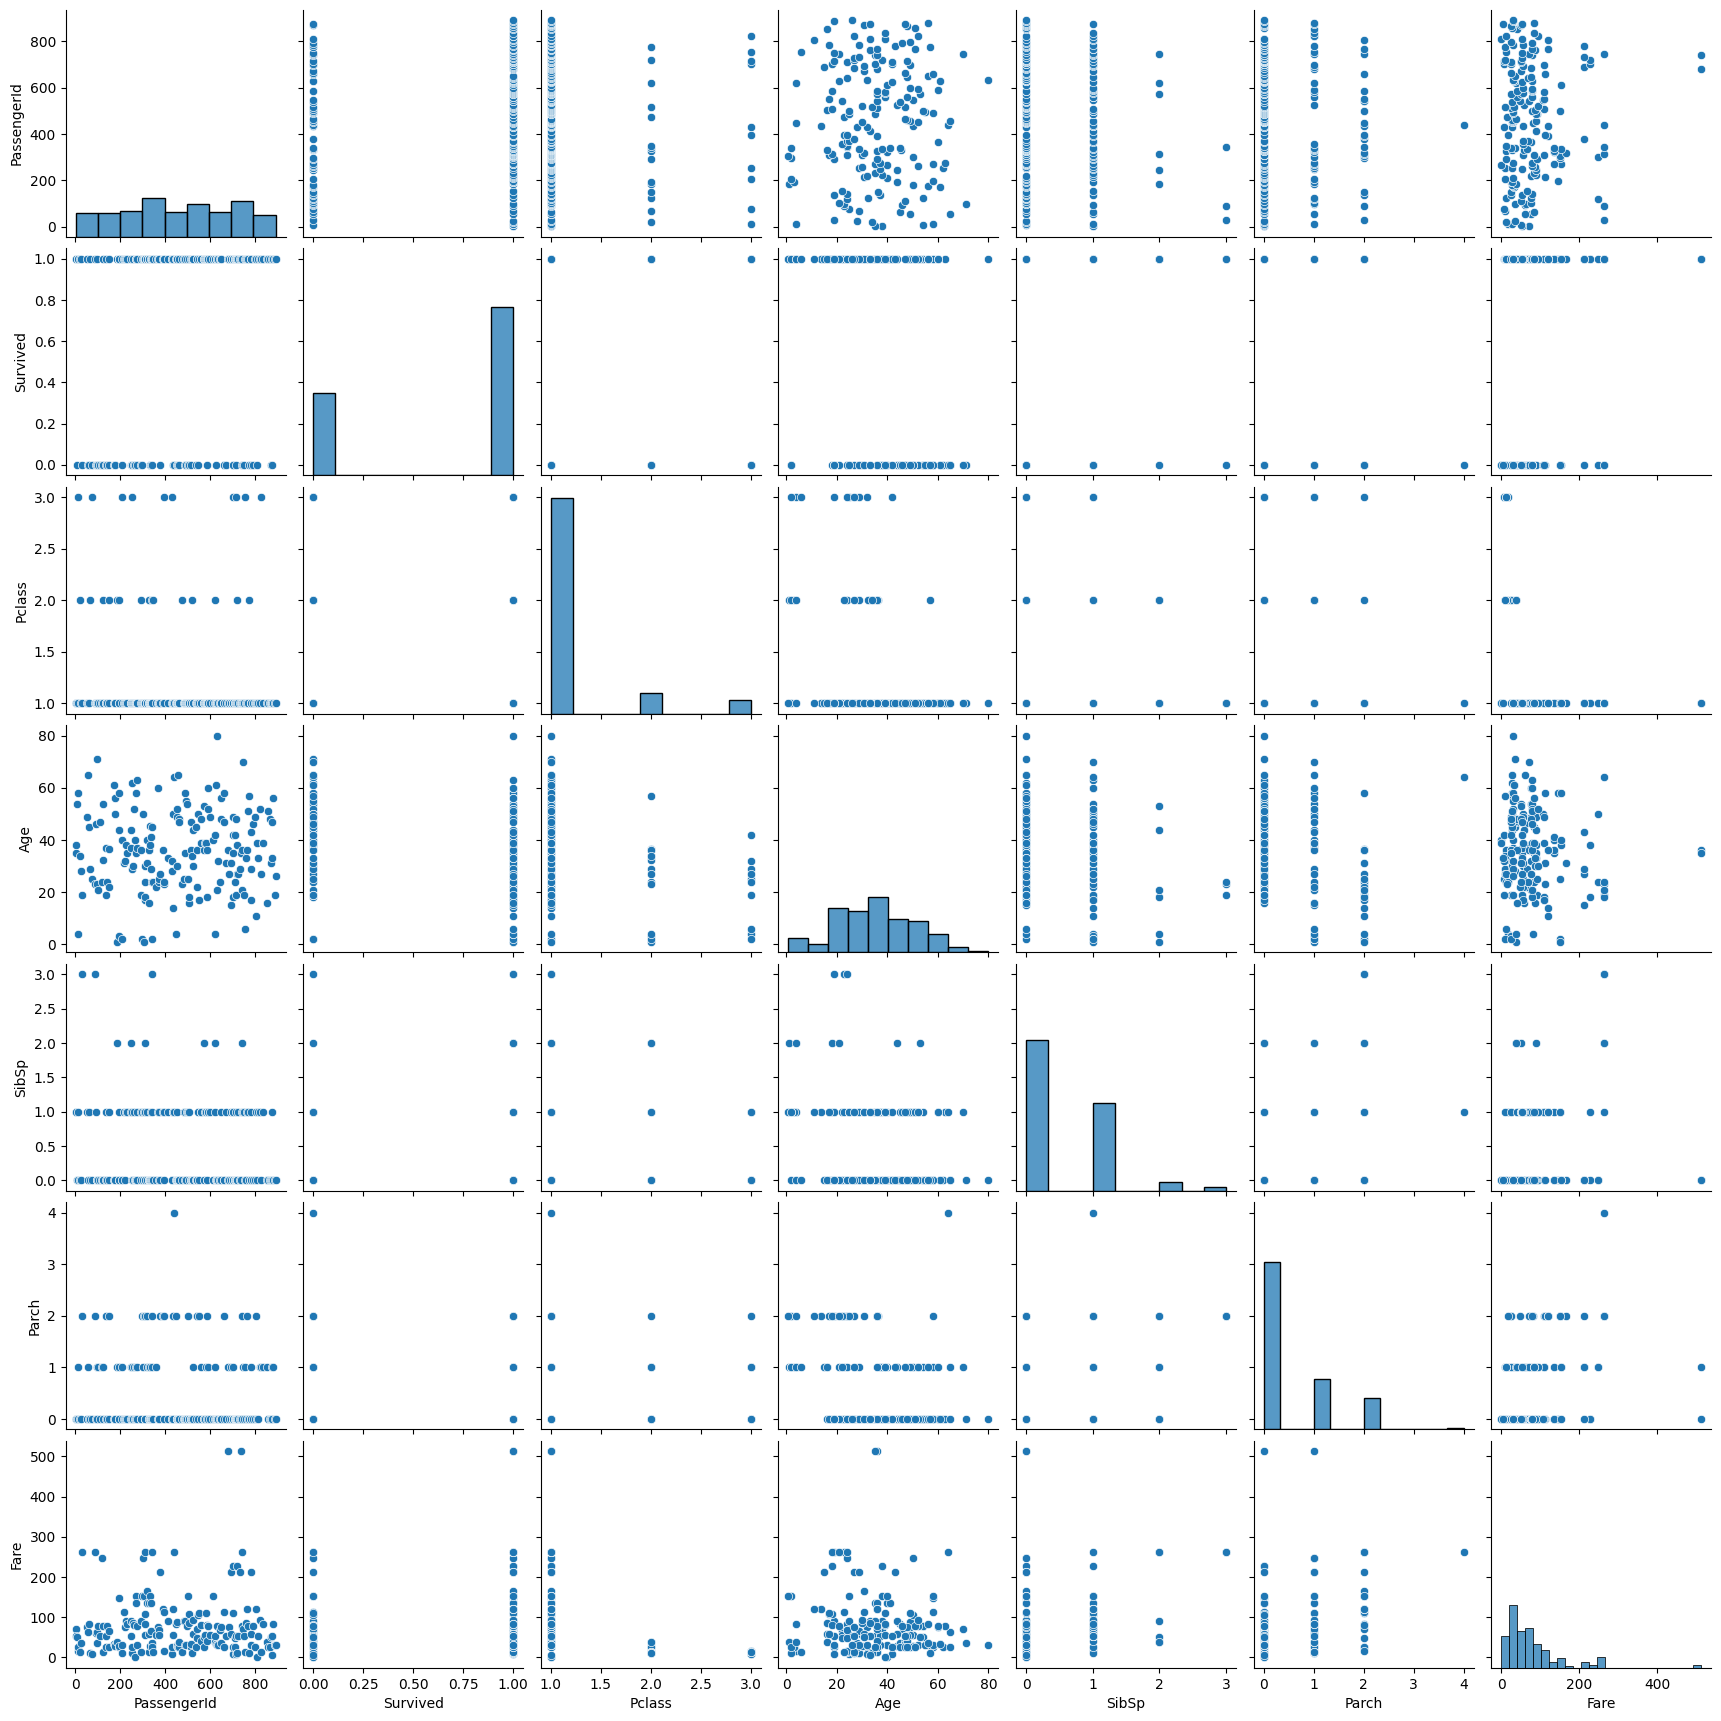

In [9]:
import seaborn as sns 
sns.pairplot(data)

In [10]:
#2.	Encode categorical variables using one-hot encoding or label encoding. 
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data.loc[:, column] = label_encoders[column].fit_transform(data[column])


This code uses the LabelEncoder from scikit-learn to convert categorical columns in the data into numerical columns, allowing for numerical computations and analysis on data that was previously in a non-numerical format. The LabelEncoder is applied to each categorical column, and the resulting numerical values are replacing the original categorical values in the data.

In [11]:
data

PassengerId  Survived  Pclass Name Sex   Age  SibSp  Parch Ticket  \
1              2         1       1   49   0  38.0      1      0    109   
3              4         1       1   70   0  35.0      1      0     31   
6              7         0       1  112   1  54.0      0      0     55   
10            11         1       3  148   0   4.0      1      1    120   
11            12         1       1   27   0  58.0      0      0     26   
..           ...       ...     ...  ...  ..   ...    ...    ...    ...   
871          872         1       1   18   0  47.0      1      1     33   
872          873         0       1   35   1  33.0      0      0     89   
879          880         1       1  140   0  56.0      0      1     38   
887          888         1       1   75   0  19.0      0      0     10   
889          890         1       1   20   1  26.0      0      0      8   

        Fare Cabin Embarked  
1    71.2833    72        0  
3    53.1000    48        2  
6    51.8625   117        2  
10   16.7000   131        2  
11   26.5500    43        2  
..       ...   ...      ...  
871  52.5542    91        2  
872   5.0000    29        2  
879  83.1583    61        0  
887  30.0000    25        2  
889  30.0000    52        0  

[183 rows x 12 columns]

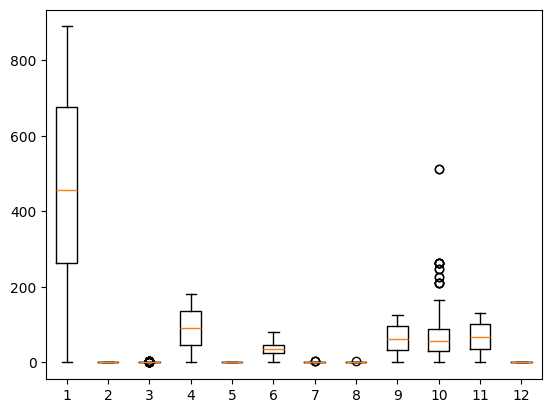

In [12]:
#3.	Explore data distributions using histograms and box plots.
import matplotlib.pyplot as plt 
plt.boxplot(data)
plt.show()

By analyzing the boxplot, you can gain insights into the distribution of your data, such as:
1.The central tendency (median)
2.The spread (interquartile range, IQR)
3.The presence of outliers
4.The skewness of the data


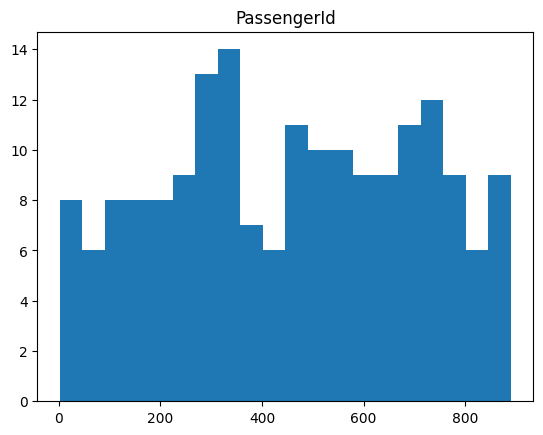

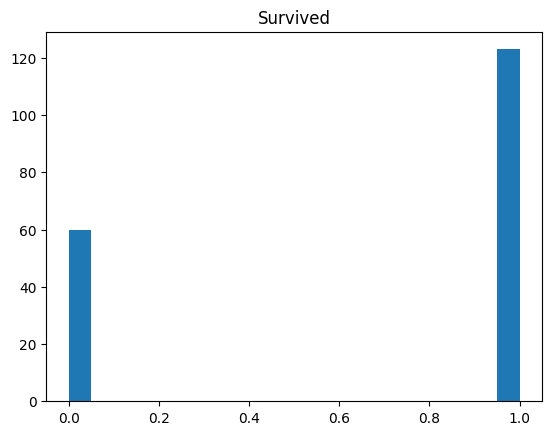

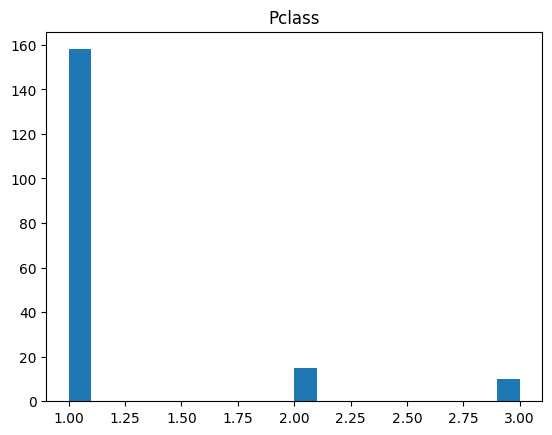

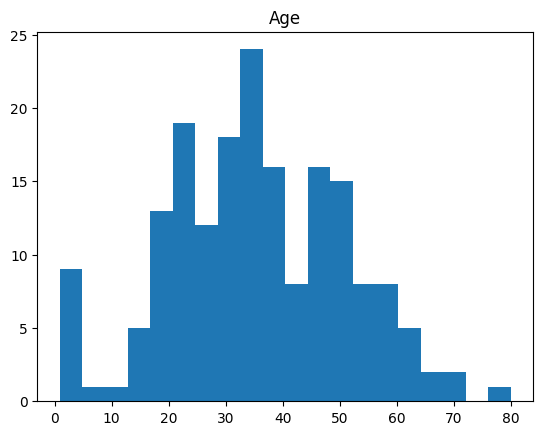

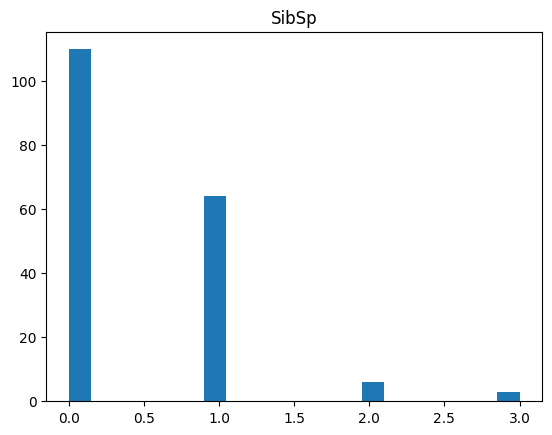

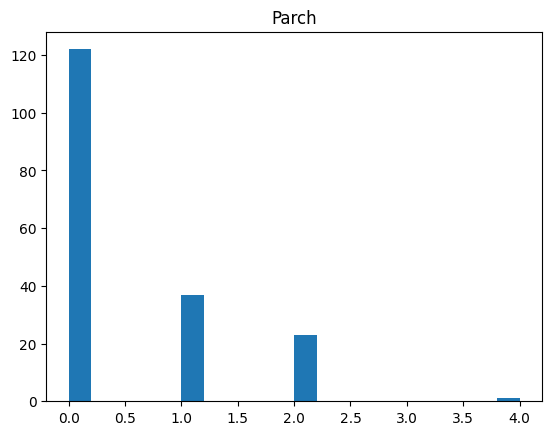

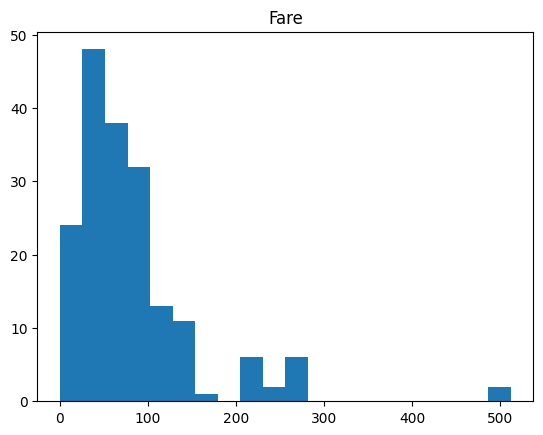

In [13]:
import matplotlib.pyplot as plt
# Generate histograms for each column
for col in ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    plt.hist(data[col], bins=20)
    plt.title(col)
    plt.show()


The above code creates a histogram of the data. A histogram is a graphical representation of the distribution of data, showing the frequency or density of values within a range. It can help you understand the shape of the distribution, including the central tendency, spread, and skewness.


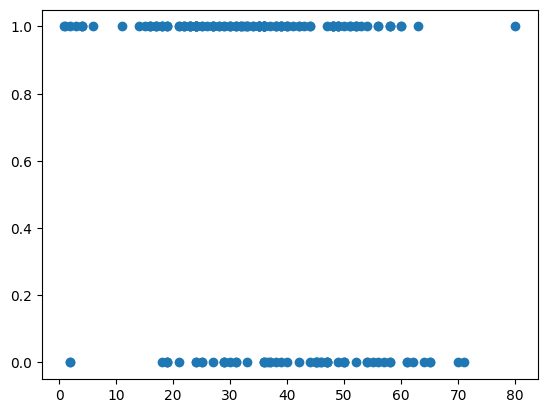

In [25]:
#3.	Explore data distributions using histograms and box plots.
plt.scatter(data['Age'],data['Survived'])

The code plt.scatter(data['Age'],data['Survived']) creates a scatter plot with 'Age' on the x-axis and 'Survived' (0 or 1) on the y-axis, showing the distribution of survivors and non-survivors across different age groups.

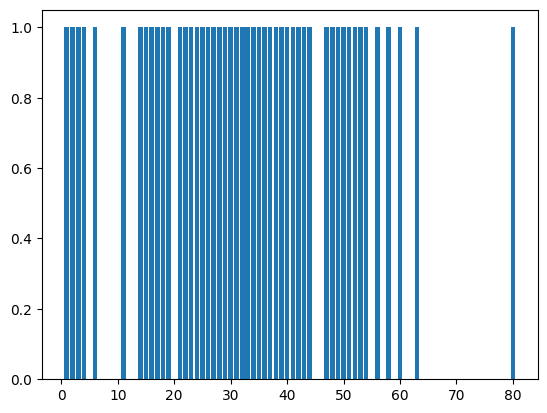

In [26]:
plt.bar(data['Age'],data['Survived'])
plt.show()

This code creates a bar plot where the x-axis represents the 'Age' of the passengers and the y-axis represents the number of survivors (0 or 1) at each age, showing the count of survivors and non-survivors at each age group.

The plt.bar() function is used to create the bar plot, and plt.show() is used to display the plot, allowing for a visual analysis of the relationship between age and survival.

# Building Predictive Models:

In [27]:
from numpy import loadtxt
from xgboost import XGBClassifier


In [28]:
x=data.iloc[:,:-1] #independent varible
y=data.iloc[:,-1] #dependent varible
x.shape,y.shape

((183, 11), (183,))

In [29]:
#1.	Split the preprocessed dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x_train,y_train

(     PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
 331          332         0       1   131    1  45.5      0      0      13   
 336          337         0       1   132    1  29.0      1      0      24   
 193          194         1       2   123    1   3.0      1      1      66   
 75            76         0       3   117    1  25.0      0      0      78   
 248          249         1       1    17    1  37.0      1      1      33   
 ..           ...       ...     ...   ...  ...   ...    ...    ...     ...   
 520          521         1       1   136    0  30.0      0      0      43   
 92            93         0       1    41    1  46.0      1      0     125   
 460          461         1       1     4    1  48.0      0      0      64   
 872          873         0       1    35    1  33.0      0      0      89   
 505          506         0       1   134    1  18.0      1      0     116   
 
          Fare  Cabin  
 331   28.5000     49  
 336   66.6000

In [30]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((146, 11), (146,), (37, 11), (37,))

In [31]:
xgb_model=XGBClassifier()

In [32]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [33]:
#make prediction for test data
y_train_pred=xgb_model.predict(x_train)
y_train_pred

array([2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0], dtype=int64)

In [34]:
y_test_pred=xgb_model.predict(x_test)
y_test_pred

array([0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
#2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("\nXGBOOST Model Evaluation:")
print(classification_report(y_test,xgb_model.predict(x_test)))
print("Confusion Matrix:")
print(confusion_matrix(y_test,xgb_model.predict(x_test)))
print("accuracy_score:")
print(accuracy_score(y_test,xgb_model.predict(x_test)))




XGBOOST Model Evaluation:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           2       0.78      0.74      0.76        19

    accuracy                           0.76        37
   macro avg       0.76      0.76      0.76        37
weighted avg       0.76      0.76      0.76        37

Confusion Matrix:
[[14  4]
 [ 5 14]]
accuracy_score:
0.7567567567567568


In [42]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 812.7 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 2.0 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.4 MB 2.9 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 3.4 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.4 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
#3.	Build predictive models using LightGBM and XGBoost algorithms.
#import lightgbm as lgb
#d_train=lgb.data(x_train,label=y_train)
from lightgbm import LGBMClassifier
lgb_model=LGBMClassifier()
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 11
[LightGBM] [Info] Start training from score -1.133459
[LightGBM] [Info] Start training from score -4.290459
[LightGBM] [Info] Start training from score -0.408896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

LGBMClassifier()

In [46]:
y_pred = lgb_model.predict(x_train)
y_pred

array([2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0])

In [47]:
accuracy = accuracy_score(y_train, y_pred)
print("LightGBM Accuracy:", accuracy)

LightGBM Accuracy: 1.0


In [48]:
print("\nLightGBM  Model Evaluation:")
print(classification_report(y_test,lgb_model.predict(x_test)))
print("Confusion Matrix:")
print(confusion_matrix(y_test,lgb_model.predict(x_test)))


LightGBM  Model Evaluation:
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           2       0.68      0.79      0.73        19

    accuracy                           0.70        37
   macro avg       0.71      0.70      0.70        37
weighted avg       0.71      0.70      0.70        37

Confusion Matrix:
[[11  7]
 [ 4 15]]


# Comparative Analysis

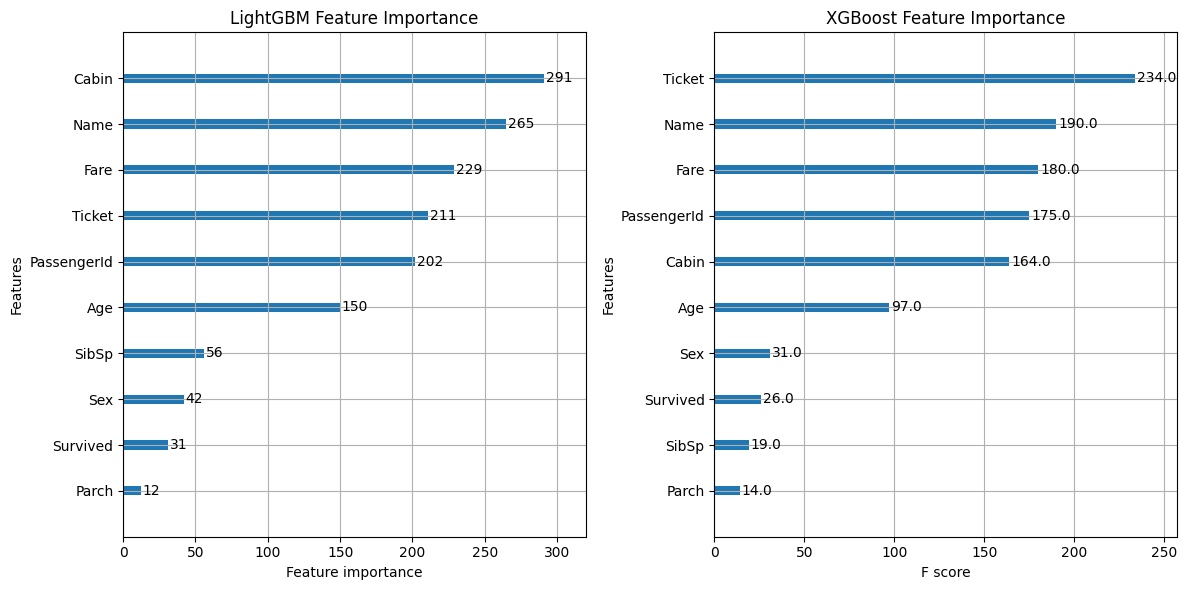

In [49]:
import lightgbm as lgb
import xgboost as xgb
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
lgb.plot_importance(lgb_model, ax=ax[0])
ax[0].set_title("LightGBM Feature Importance")
xgb.plot_importance(xgb_model, ax=ax[1])
ax[1].set_title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

This code imports the LightGBM and XGBoost libraries and assigns them aliases for convenience. It then creates a figure with two subplots using matplotlib, setting the figure size to (12,6).

The code plots the feature importance of the LightGBM model on the first subplot and the XGBoost model on the second subplot, using the plot_importance function from each library. The titles of the subplots are set to "LightGBM Feature Importance" and "XGBoost Feature Importance", respectively.

The final two lines of code adjust the layout of the figure to ensure proper fitting of the plots and titles, and display the figure, allowing for a side-by-side comparison of feature importance between the two models.